In [1]:
import json
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import networkx as nx

import sys
sys.path.append('..')
import network_utils as ne

In [2]:
SAVEFIG = False
TITLEFONT = {'fontname': 'arial', 'size': 14}
LABELFONT = {'fontname': 'arial', 'size': 14}
LEGENDFONT = {'family': 'arial', 'size': 10}
TICKPARAM = {'family': 'arial', 'size': 10}

In [3]:
with pd.HDFStore('../data/gene_network_data.h5') as store:
    tec = store['TEC']
    rna = store['RNA']
np_tec_abs = np.abs(tec.to_numpy(copy=True))
np_rna_abs = np.abs(rna.to_numpy(copy=True))

In [4]:
# check same gene list between TEC and RNA co-expression 
(tec.columns == rna.columns).all()

np.True_

In [5]:
thresholds = [0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]
tec_num_cc = [] 
tec_isolated_nodes = []
rna_num_cc = [] 
rna_isolated_nodes = []

tec_num_nodes = []
tec_num_edges = []
rna_num_nodes = []
rna_num_edges = []
for th in thresholds:
    tec_al = ne.threshold_adjacency_list(np_tec_abs, th)
    rna_al = ne.threshold_adjacency_list(np_rna_abs, th)

    cc, iso_nodes = ne.connected_components(tec_al)
    tec_num_cc.append(cc)
    tec_isolated_nodes.append(iso_nodes)
    n_nodes, n_edges = ne.nodes_and_edges(tec_al)
    tec_num_nodes.append(n_nodes)
    tec_num_edges.append(n_edges)

    cc, iso_nodes = ne.connected_components(rna_al)
    rna_num_cc.append(cc)
    rna_isolated_nodes.append(iso_nodes)
    n_nodes, n_edges = ne.nodes_and_edges(rna_al)
    rna_num_nodes.append(n_nodes)
    rna_num_edges.append(n_edges)

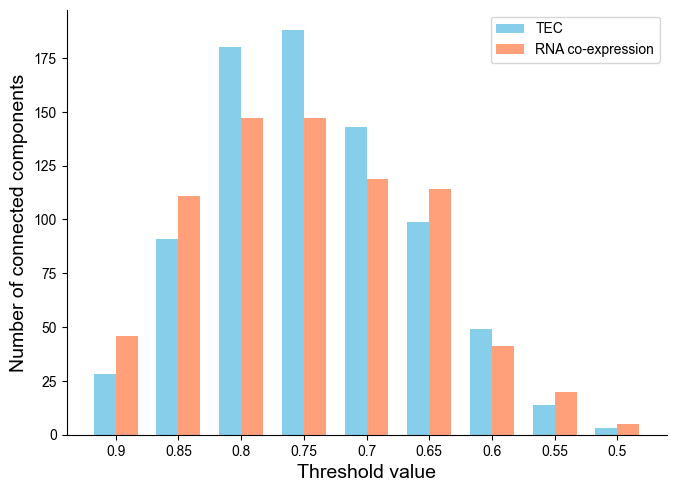

In [6]:
n = len(thresholds)
x = np.arange(n)
bar_width = 0.35

# plot figure
plt.figure(figsize=(6, 4.25))
plt.bar(x - bar_width/2, tec_num_cc, width=bar_width, color="skyblue", label='TEC')
plt.bar(x + bar_width/2, rna_num_cc, width=bar_width, color="lightsalmon", label='RNA co-expression')
plt.legend(prop=LEGENDFONT)

# adjust display
plt.xticks(x, thresholds, **TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca() 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig1a.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel("Threshold value", **LABELFONT)
    plt.ylabel('Number of connected components', **LABELFONT)
plt.show()

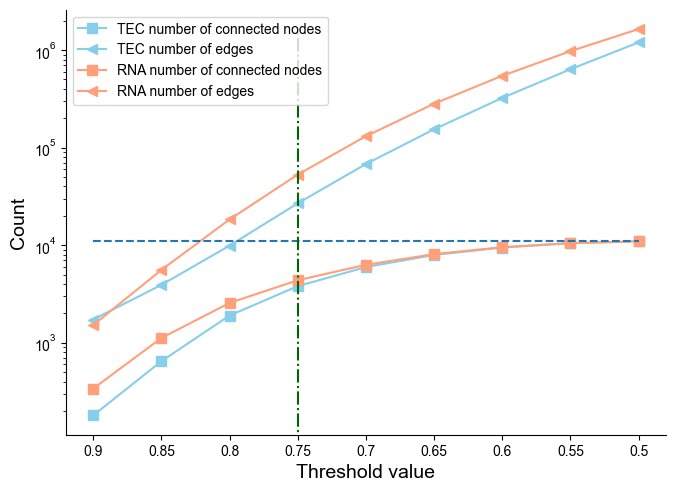

In [7]:
n = len(thresholds)
x = np.arange(n)
ymax = max(max(tec_num_edges), max(rna_num_edges))

# plot figure
plt.figure(figsize=(6, 4.25))
plt.plot(x, tec_num_nodes, marker='s', markersize=7, label='TEC number of connected nodes', color='skyblue')
plt.plot(x, tec_num_edges, marker='<', markersize=7,  label='TEC number of edges', color='skyblue')

plt.plot(x, rna_num_nodes, marker='s', markersize=7, label='RNA number of connected nodes', color='lightsalmon')
plt.plot(x, rna_num_edges, marker='<', markersize=7,  label='RNA number of edges', color='lightsalmon')

plt.hlines([11088], xmin=0, xmax=n-1, linestyles='--') # max number of nodes
plt.vlines([3], ymin=0, ymax=ymax, linestyles='-.', color='darkgreen')
plt.yscale('log')
plt.legend(prop=LEGENDFONT)

# adjust display
plt.xticks(x, thresholds, **TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig1b.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel("Threshold value", **LABELFONT)
    plt.ylabel('Count', **LABELFONT)
plt.show()

In [8]:
THRESHOLD = 0.75
rna_al = ne.threshold_weighted_adjacency_list(np_rna_abs, 0.75)
rna_graph_75 = ne.construct_network(rna_al, "RNA_75", rna.columns)
rna_degree_sequence = sorted((d for n, d in rna_graph_75.degree()), reverse=True)
max_degree = max(rna_degree_sequence)

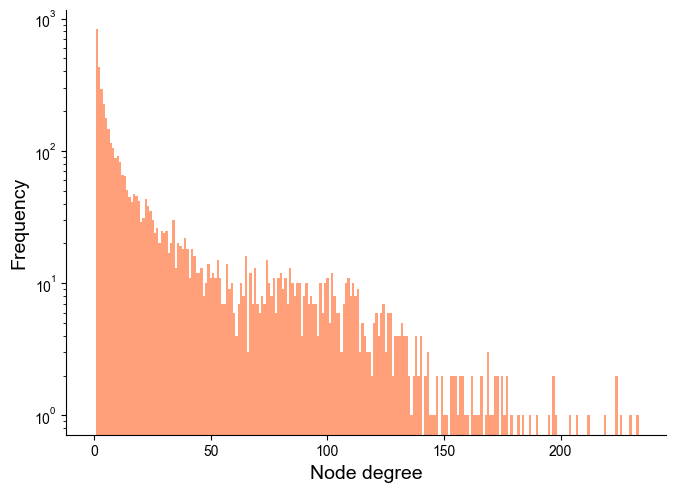

In [9]:
# plot figure
plt.figure(figsize=(6, 4.25))
plt.hist(rna_degree_sequence, bins=range(0, max_degree + 2), color='lightsalmon', edgecolor='none', align='left')
plt.yscale('log')

# adjust display
plt.xticks(**TICKPARAM)
plt.yticks(**TICKPARAM)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig1c.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel('Node degree', **LABELFONT)
    plt.ylabel('Frequency', **LABELFONT)
plt.show()